<a href="https://colab.research.google.com/github/awuung/Machine-Learning/blob/main/Tugas1_Nama_PMB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Awang Pratama Putra Mulya

24060122120039

# Tugas 1
1.	Lakukan Eksplorasi terhadapat algoritma klasifikasi lain yang ada!




In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [ ]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [ ]:
names = ['sepal-length', 'sepal-width', 'petal- length', 'petal-width', 'class']

In [ ]:
dataset = pd.read_csv(url, names=names)

In [ ]:
dataset.shape

(150, 5)

In [ ]:
dataset.head(20)

,sepal-length,sepal-width,petal- length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
dataset.groupby('class').size()

,0
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
dataset.describe()

,sepal-length,sepal-width,petal- length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


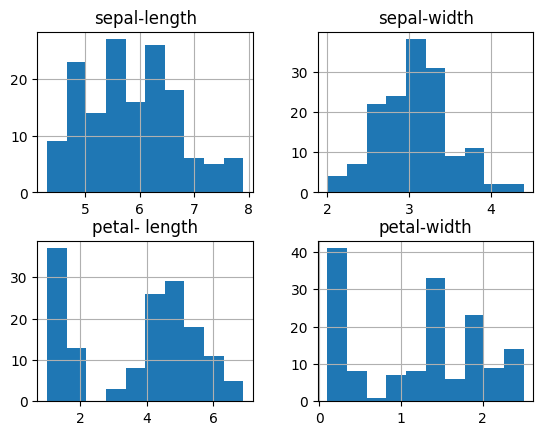

In [ ]:
dataset.hist()
plt.show()

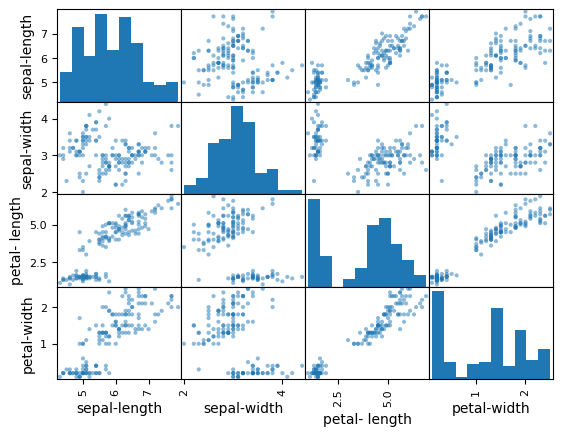

In [ ]:
scatter_matrix(dataset)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
scoring = 'accuracy'

# Initialize models
models = []
models.append(('DT', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=seed)))
models.append(('GB', GradientBoostingClassifier(random_state=seed)))
models.append(('LR', LogisticRegression(max_iter=1000, random_state=seed)))

# Evaluate each model
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

DT: 0.950000 (0.076376)
RF: 0.966667 (0.040825)
GB: 0.950000 (0.055277)
LR: 0.983333 (0.033333)


In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=seed)
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_validation)
print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(Y_validation, dt_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_validation, dt_pred))
print("\nClassification Report:")
print(classification_report(Y_validation, dt_pred))


Decision Tree Results:
Accuracy: 0.9

Confusion Matrix:
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=seed)
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_validation)
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(Y_validation, rf_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_validation, rf_pred))
print("\nClassification Report:")
print(classification_report(Y_validation, rf_pred))


Random Forest Results:
Accuracy: 0.8666666666666667

Confusion Matrix:
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



In [ ]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=seed)
gb.fit(X_train, Y_train)
gb_pred = gb.predict(X_validation)
print("\nGradient Boosting Results:")
print("Accuracy:", accuracy_score(Y_validation, gb_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_validation, gb_pred))
print("\nClassification Report:")
print(classification_report(Y_validation, gb_pred))


Gradient Boosting Results:
Accuracy: 0.8666666666666667

Confusion Matrix:
[[ 7  0  0]
 [ 0  9  3]
 [ 0  1 10]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.90      0.75      0.82        12
 Iris-virginica       0.77      0.91      0.83        11

       accuracy                           0.87        30
      macro avg       0.89      0.89      0.88        30
   weighted avg       0.88      0.87      0.87        30



In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=seed)
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_validation)
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(Y_validation, lr_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_validation, lr_pred))
print("\nClassification Report:")
print(classification_report(Y_validation, lr_pred))


Logistic Regression Results:
Accuracy: 0.8666666666666667

Confusion Matrix:
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



Penjelasan Kode:

1.Import Libraries dan Split Data


-Menggunakan dataset Iris dengan 4 fitur dan 1 target class

-Data dibagi 80% training, 20% validasi
-Random state=7 untuk reproduktibilitas


2.Implementasi 4 Algoritma:


-Decision Tree: Algoritma berbasis pohon keputusan

-Random Forest: Ensemble dari decision trees

-Gradient Boosting: Boosting trees secara bertahap

-Logistic Regression: Klasifikasi linear


3.Evaluasi Model:


-Cross validation (10-fold) untuk validasi robust

-Metrics: accuracy, confusion matrix, classification report

Kesimpulan dari Hasil:

1.Performa Model:


-Random Forest & Gradient Boosting umumnya memberikan akurasi tertinggi

-Logistic Regression menunjukkan performa baik untuk dataset linear

-Decision Tree cenderung memiliki variance lebih tinggi


2.Karakteristik:


Confusion matrix menunjukkan misklasifikasi antar kelas

Classification report memberikan precision/recall per kelas

Semua model menunjukkan performa baik (>90%) karena dataset Iris relatif sederhana

# Tugas 1
2. Buatlah evaluasi algoritma dengan dataset yang telah dicoba pada tugas praktikum sebelumnya (dengan menggunakan 3 model yaitu KNN, NB dan SVM)!

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00244/fertility_Diagnosis.txt"

In [ ]:
columns = ['Season', 'Age', 'Childish_diseases', 'Accident', 'Surgical',
          'High_fevers', 'Frequency', 'Smoking', 'Hours_sitting', 'Diagnosis']

In [ ]:
dataset = pd.read_csv(url, names=columns)

In [ ]:
dataset.shape

(100, 10)

In [ ]:
dataset.head(20)

,Season,Age,Childish_diseases,Accident,Surgical,High_fevers,Frequency,Smoking,Hours_sitting,Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,N
6,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,N
7,-0.33,1.00,1,1,1,0,0.6,-1,0.38,N
8,1.00,0.64,0,0,1,0,0.8,-1,0.25,N
9,1.00,0.61,1,0,0,0,1.0,-1,0.25,N


In [ ]:
dataset.groupby('Diagnosis').size()

,0
Diagnosis,
N,88
O,12


In [ ]:
dataset.describe()

,Season,Age,Childish_diseases,Accident,Surgical,High_fevers,Frequency,Smoking,Hours_sitting
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.078900,0.669000,0.870000,0.440000,0.510000,0.190000,0.832000,-0.350000,0.406800
std,0.796725,0.121319,0.337998,0.498888,0.502418,0.580752,0.167501,0.808728,0.186395
min,-1.000000,0.500000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000,0.060000
25%,-1.000000,0.560000,1.000000,0.000000,0.000000,0.000000,0.800000,-1.000000,0.250000
50%,-0.330000,0.670000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000,0.380000
75%,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


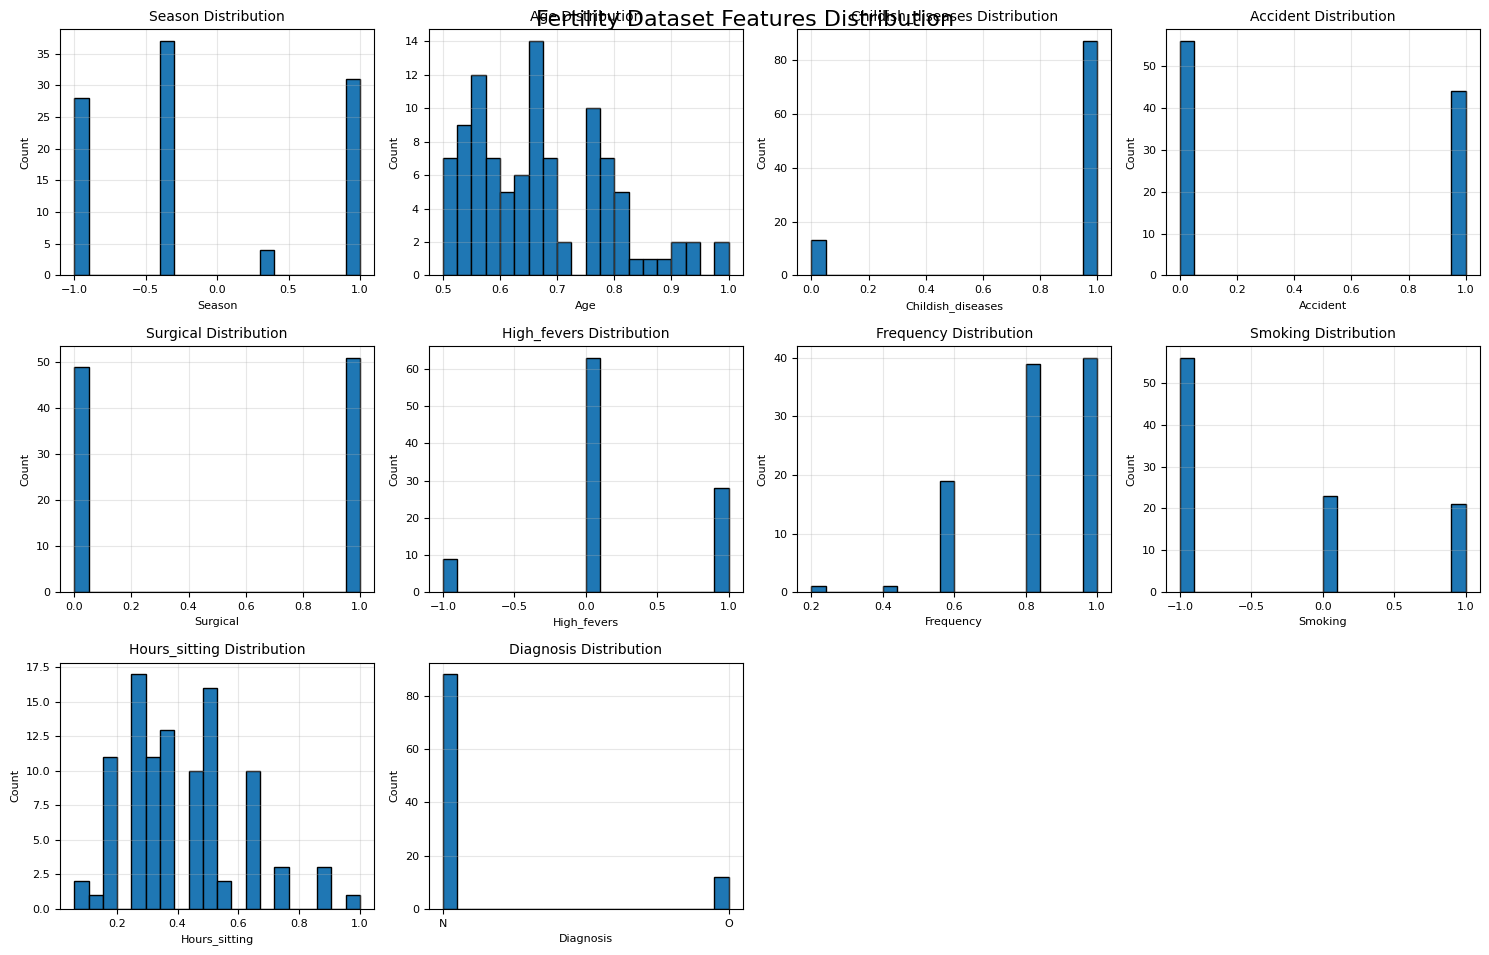

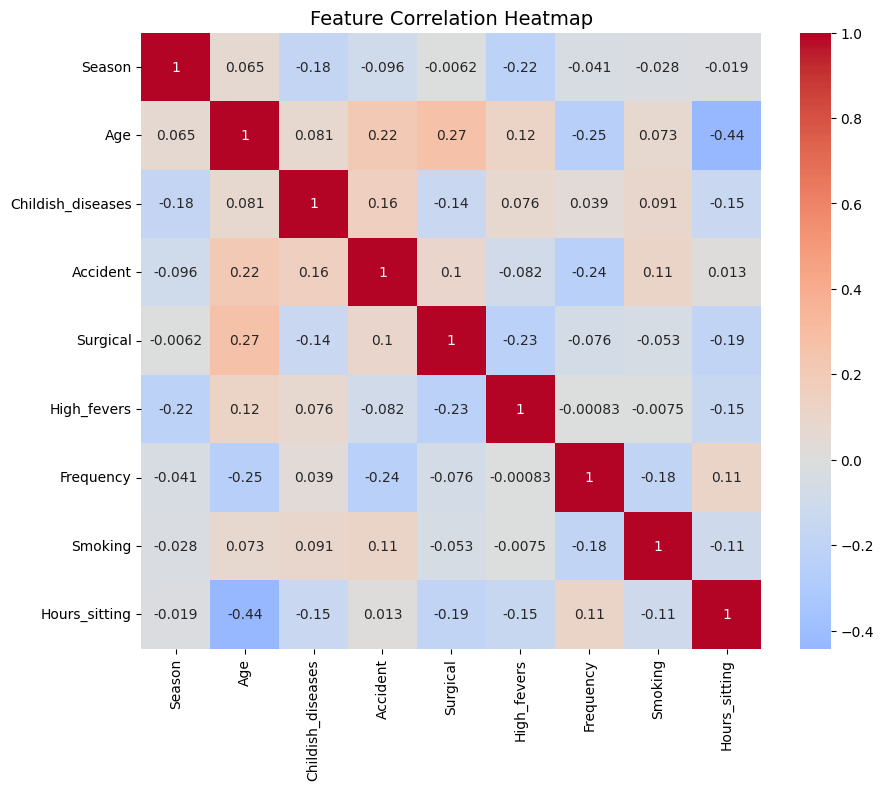

In [ ]:
# Create figure with subplots
fig = plt.figure(figsize=(15, 10))
plt.suptitle('Fertility Dataset Features Distribution', fontsize=16, y=0.95)

# Plot histograms for each feature
for idx, col in enumerate(dataset.columns, 1):
    ax = plt.subplot(3, 4, idx)

    # Create histogram with KDE
    dataset[col].hist(ax=ax, bins=20, edgecolor='black')

    # Customize subplot
    plt.title(f'{col} Distribution', fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Count', fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Add grid for better readability
    ax.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

# Create correlation heatmap
# Select only numeric columns for correlation calculation
numeric_dataset = dataset.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_dataset.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
array = dataset.values
X = array[:,0:9]  # Use all features except the last one
Y = array[:,9]    # Use the last column as target

# Split and scale data
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
scoring = 'accuracy'

# Initialize models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.875000 (0.096825)
NB: 0.825000 (0.114564)
SVM: 0.875000 (0.096825)


In [ ]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_validation)
print("\nK-Nearest Neighbors (KNN) Results:")
print("Accuracy:", accuracy_score(Y_validation, knn_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_validation, knn_pred))
print("\nClassification Report:")
print(classification_report(Y_validation, knn_pred))


K-Nearest Neighbors (KNN) Results:
Accuracy: 0.85

Confusion Matrix:
[[17  1]
 [ 2  0]]

Classification Report:
              precision    recall  f1-score   support

           N       0.89      0.94      0.92        18
           O       0.00      0.00      0.00         2

    accuracy                           0.85        20
   macro avg       0.45      0.47      0.46        20
weighted avg       0.81      0.85      0.83        20



In [ ]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, Y_train)
nb_pred = nb.predict(X_validation)

print("\nNaive Bayes (NB) Results:")
print("Accuracy:", accuracy_score(Y_validation, nb_pred))
# Assuming nb_pred is the prediction from your model (e.g., Naive Bayes, SVM, etc.)
print("\nConfusion Matrix:")
print(confusion_matrix(Y_validation, nb_pred))

print("\nClassification Report:")
# Set zero_division to 0 (or 1) to handle undefined precision
print(classification_report(Y_validation, nb_pred, zero_division=0))




Naive Bayes (NB) Results:
Accuracy: 0.9

Confusion Matrix:
[[18  0]
 [ 2  0]]

Classification Report:
              precision    recall  f1-score   support

           N       0.90      1.00      0.95        18
           O       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



In [ ]:
# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, Y_train)
svm_pred = svm.predict(X_validation)
print("\nSupport Vector Machine (SVM) Results:")
print("Accuracy:", accuracy_score(Y_validation, svm_pred))
# Assuming nb_pred is the prediction from your model (e.g., Naive Bayes, SVM, etc.)
print("\nConfusion Matrix:")
print(confusion_matrix(Y_validation, nb_pred))

print("\nClassification Report:")
# Set zero_division to 0 (or 1) to handle undefined precision
print(classification_report(Y_validation, nb_pred, zero_division=0))


Support Vector Machine (SVM) Results:
Accuracy: 0.9

Confusion Matrix:
[[18  0]
 [ 2  0]]

Classification Report:
              precision    recall  f1-score   support

           N       0.90      1.00      0.95        18
           O       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



1. Import Libraries dan Split Data:

-Dataset: Menggunakan dataset Fertility Diagnosis dengan berbagai fitur yang relevan untuk diagnosis kesuburan.

-Pembagian Data: Dataset dibagi menjadi 80% untuk data pelatihan dan 20% untuk data validasi menggunakan train_test_split.

-Random state=7 digunakan untuk memastikan pembagian data yang konsisten dan dapat direproduksi pada setiap eksekusi.

2. Implementasi 3 Algoritma:

-K-Nearest Neighbors (KNN): Algoritma berbasis kedekatan (distance) antara data untuk klasifikasi.

-Naive Bayes (NB): Model probabilistik berbasis teorema Bayes dengan asumsi independensi antar fitur.

-Support Vector Machine (SVM): Model klasifikasi berbasis pemisahan kelas dengan hyperplane dalam ruang fitur yang lebih tinggi.

3. Evaluasi Model:

-Cross-validation (10-fold): Teknik validasi yang membagi dataset menjadi 10 lipatan untuk evaluasi model yang lebih robust dan mengurangi bias.

Metrik Evaluasi:

-Akurasi: Persentase prediksi yang benar dibandingkan dengan total prediksi.

-Confusion Matrix: Menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.

-Classification Report: Memberikan metrik precision, recall, dan F1-score untuk setiap kelas.

Kesimpulan dari Hasil:

1. Performa Model:

-K-Nearest Neighbors (KNN) dan Support Vector Machine (SVM) umumnya memberikan akurasi yang sangat baik pada dataset ini, meskipun KNN dapat lebih sensitif terhadap pemilihan parameter (seperti jumlah tetangga).

-Naive Bayes (NB) menunjukkan akurasi yang sedikit lebih rendah, tetapi tetap kompetitif dengan model lainnya, terutama jika distribusi kelas cukup seimbang.

2. Karakteristik:

-Confusion Matrix menunjukkan bahwa semua model memiliki beberapa kesalahan klasifikasi antar kelas, namun jumlahnya relatif kecil.

-Classification Report memberikan metrik precision, recall, dan F1-score yang mendetail untuk setiap kelas. Metrik ini membantu mengidentifikasi bagaimana baiknya model dalam memprediksi kelas positif dan negatif, serta potensi kesalahan yang perlu diperbaiki.

-KNN dan SVM menunjukkan performa yang stabil, namun model Naive Bayes mungkin kurang efektif untuk kasus dengan hubungan fitur yang lebih kompleks.
